# Project 3

## Dimensionality Reduction

In this project, I will be showing you the 3 big dimensionality reduction methods. PCA (Principal Component Analysis), LDA (Linear Discriminant Analysis) and TSNE(T-Distributed Stochastic Neighbour Embedding). I will be using the MNIST Dataset to show these 3 methods.

### PCA

PCA is basically a linear tranformation algorithm the tries to take the original features of your data and turn it into a smaller set of features without losing a lot of information. We will start by importing the MNIST dataset and PCA from sklearn. We will also check the shape and look at what we have in the dataset.

In [30]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

train = pd.read_csv('C:/Users/Derek/Desktop/mnist_train.csv')

In [31]:
print(train.shape)

(60000, 785)


In [32]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, we will take out the label column and store that somewhere. Then we can check and make sure it was deleted from out train set.

In [33]:
label = train['label']
train = train.drop("label", axis = 1)

In [34]:
train.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


First thing we can do is just look at some of the numbers we have.  This will give us an idea of what we are looking at when we start looking at the eigenvalues.

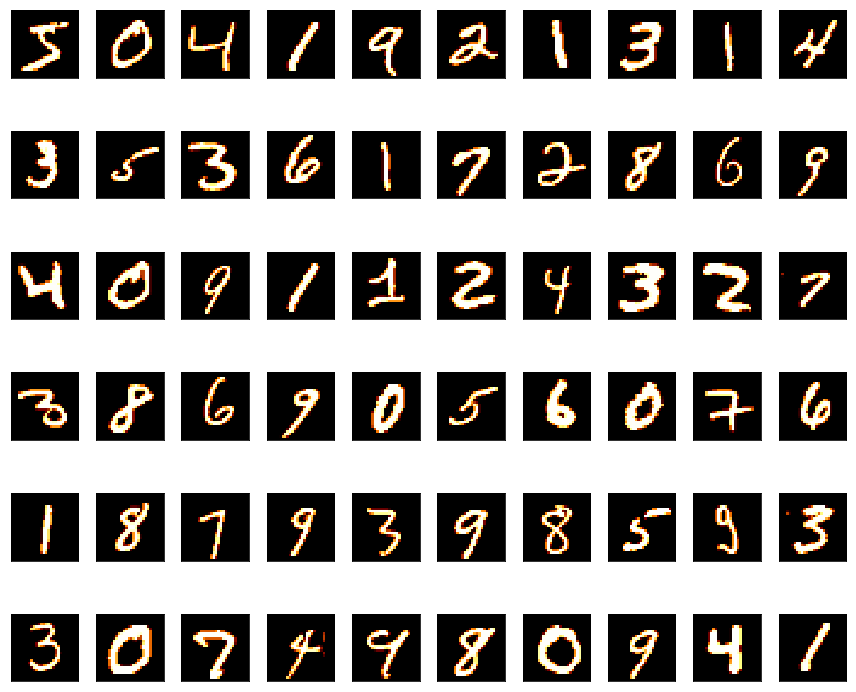

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
for digit_num in range(0,60):
    plt.subplot(7,10,digit_num+1)
    grid_data = train.iloc[digit_num].values.reshape(28,28) 
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

Now that we have seen this, we can start looking at some eigenvalues. First thing we will do, is use the PCA method to extract the top 20 eigenavalues.

In [36]:
n_components = 20
pca = PCA(n_components=n_components).fit(train.values)

eigenvalues = pca.components_.reshape(n_components, 28, 28)
eigenvalues = pca.components_

We will now plot a couple of these eigenvalues so we can see what they look like.

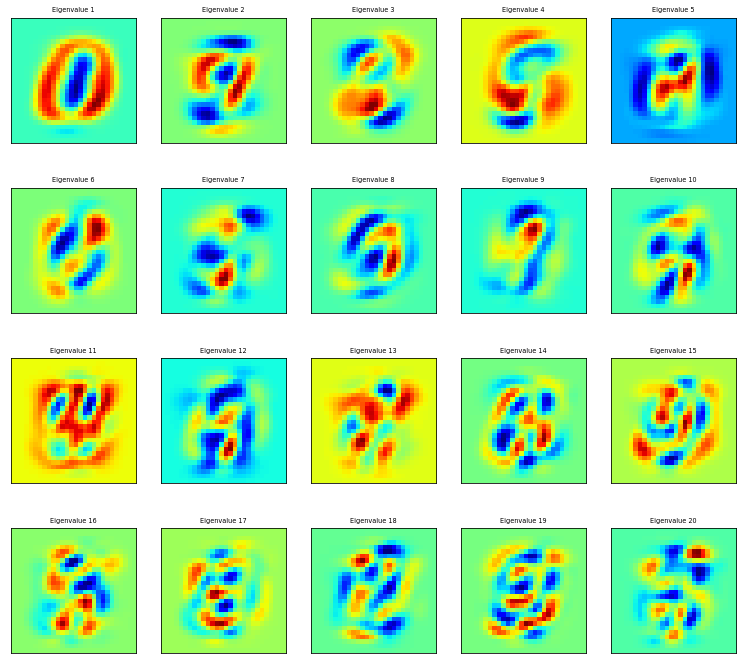

In [37]:
n_row = 4
n_col = 5

# Plot the first 8 eignenvalues
plt.figure(figsize=(13,12))
for i in list(range(n_row * n_col)):
    offset =0
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenvalues[i].reshape(28,28), cmap='jet')
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=6.5)
    plt.xticks(())
    plt.yticks(())
plt.show()

These picture portray the top 20 optimal directions that the PCA method has decided for out dataset. Now that we have these visuals, its time to actually implemenent the PCA algorithm

In [38]:
from sklearn.preprocessing import StandardScaler

X= train[:6000].values
del train
# Standardising the values
X_std = StandardScaler().fit_transform(X)

# Call the PCA method with 5 components. 
pca = PCA(n_components=5)
pca.fit(X_std)
X_5d = pca.transform(X_std)

# For cluster coloring in our Plotly plots, remember to also restrict the target values 
Label = label[:6000]

D:\Python\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

D:\Python\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [54]:
import plotly.graph_objs as go
import plotly
from plotly.offline import *

trace0 = go.Scatter(
    x = X_5d[:,0],
    y = X_5d[:,1],
#     name = Target,
#     hoveron = Target,
    mode = 'markers',
    text = Label,
    showlegend = False,
    marker = dict(
        size = 8,
        color = Label,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [trace0]


fig = dict(data=data)
plotly.offline.plot(fig, filename='styled-scatter.html')

'styled-scatter.html'

The graph below shows us the PCA graph. The clusters represent the underlying digit that each data point contribures to.

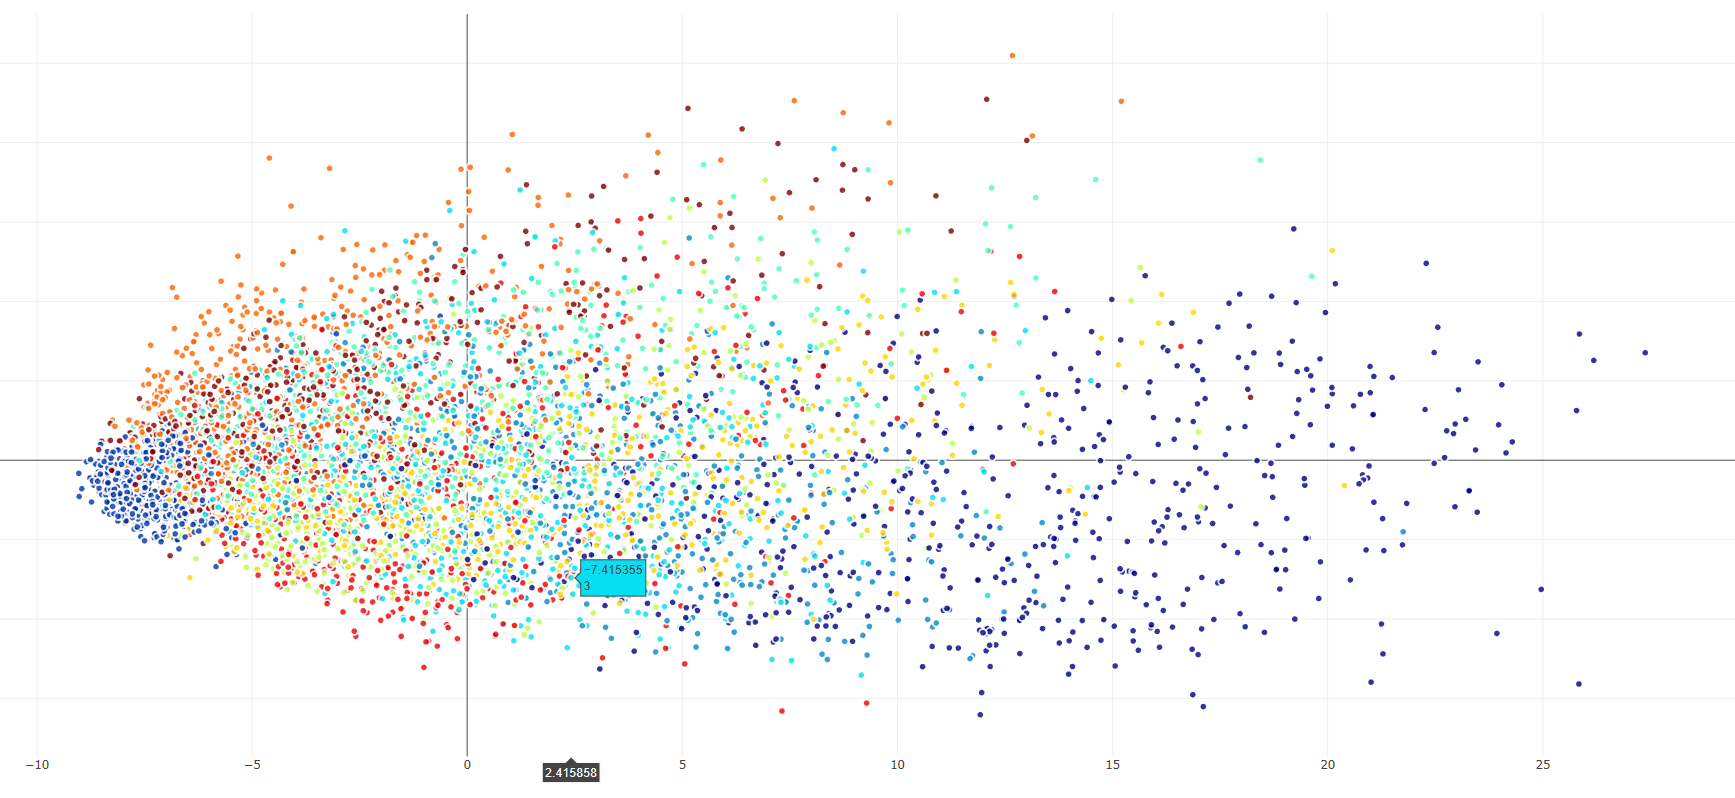

### LDA

Now we will talk about the second dimensionality reduction methods. LDA is very similar to PCA, however, LDA is a supervised learning method while PCA is an unsupervised learning method. For the next 2 examples, we are just going to implement each method. We will start by importing LDA from sklearn and then invoking the LDA model.

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=5)
# Taking in as second argument the Target as labels
X_LDA_2D = lda.fit_transform(X_std, Label.values )

D:\Python\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning:

Variables are collinear.



Now that we have done this, its time to plot this the same way we did earlier.

In [66]:
traceLDA = go.Scatter(
    x = X_LDA_2D[:,0],
    y = X_LDA_2D[:,1],
    mode = 'markers',
    text = Label,
    showlegend = True,
    marker = dict(
        size = 8,
        color = Label,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [traceLDA]

fig = dict(data=data)
plotly.offline.plot(fig, filename='styled-scatter.html')

'styled-scatter.html'

As you can see from the picture below, the data points for each number are more clustered when using LDA than when using PCA. This is the advantage of having class labels to supervise the method with.

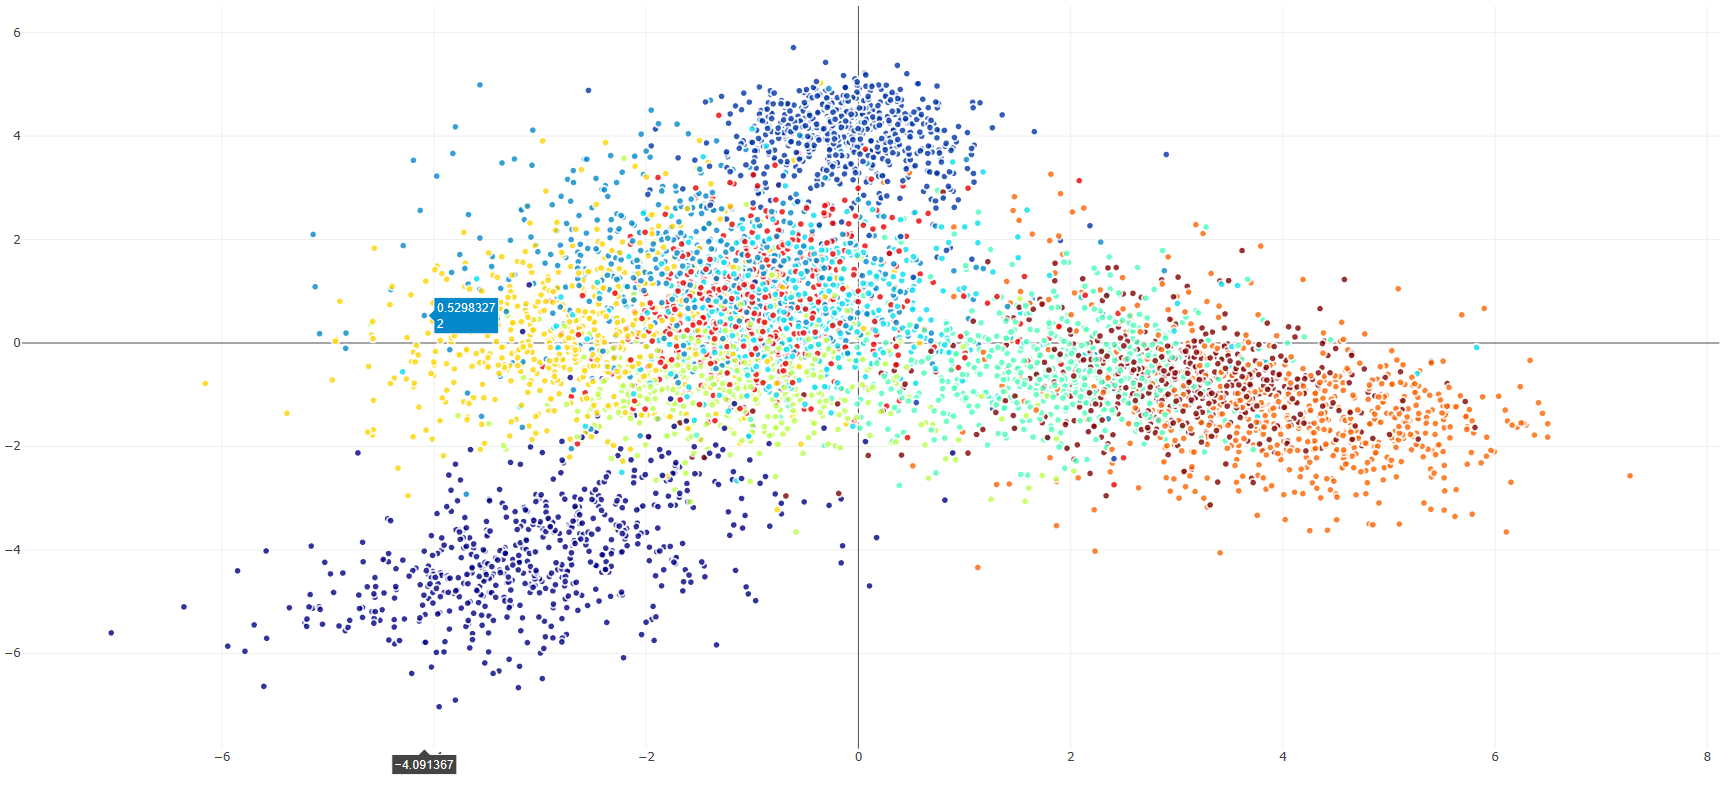

### TSNE

Now we will look at our last dimensionality reduction method, TSNE. TSNE is different than the previous 2 methods because it is a non-linear probabilistic dimensionality reduction method. We are going to start off by importing TSNE from sklearn and then invoking this method. 

In [60]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X_std)

Once again, we will plot this so we can compare it 2 the previous 2 dimensionality reduction methods.

In [67]:
traceTSNE = go.Scatter(
    x = tsne_results[:,0],
    y = tsne_results[:,1],
    mode = 'markers',
    text = Label,
    showlegend = True,
    marker = dict(
        size = 8,
        color = Label,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
    )
)
data = [traceTSNE]

fig = dict(data=data)
plotly.offline.plot(fig, filename='styled-scatter.html')

'styled-scatter.html'

From the TSNE plot below, you can see that the indiviual numbers are even more defined and spread out than the LDA method.

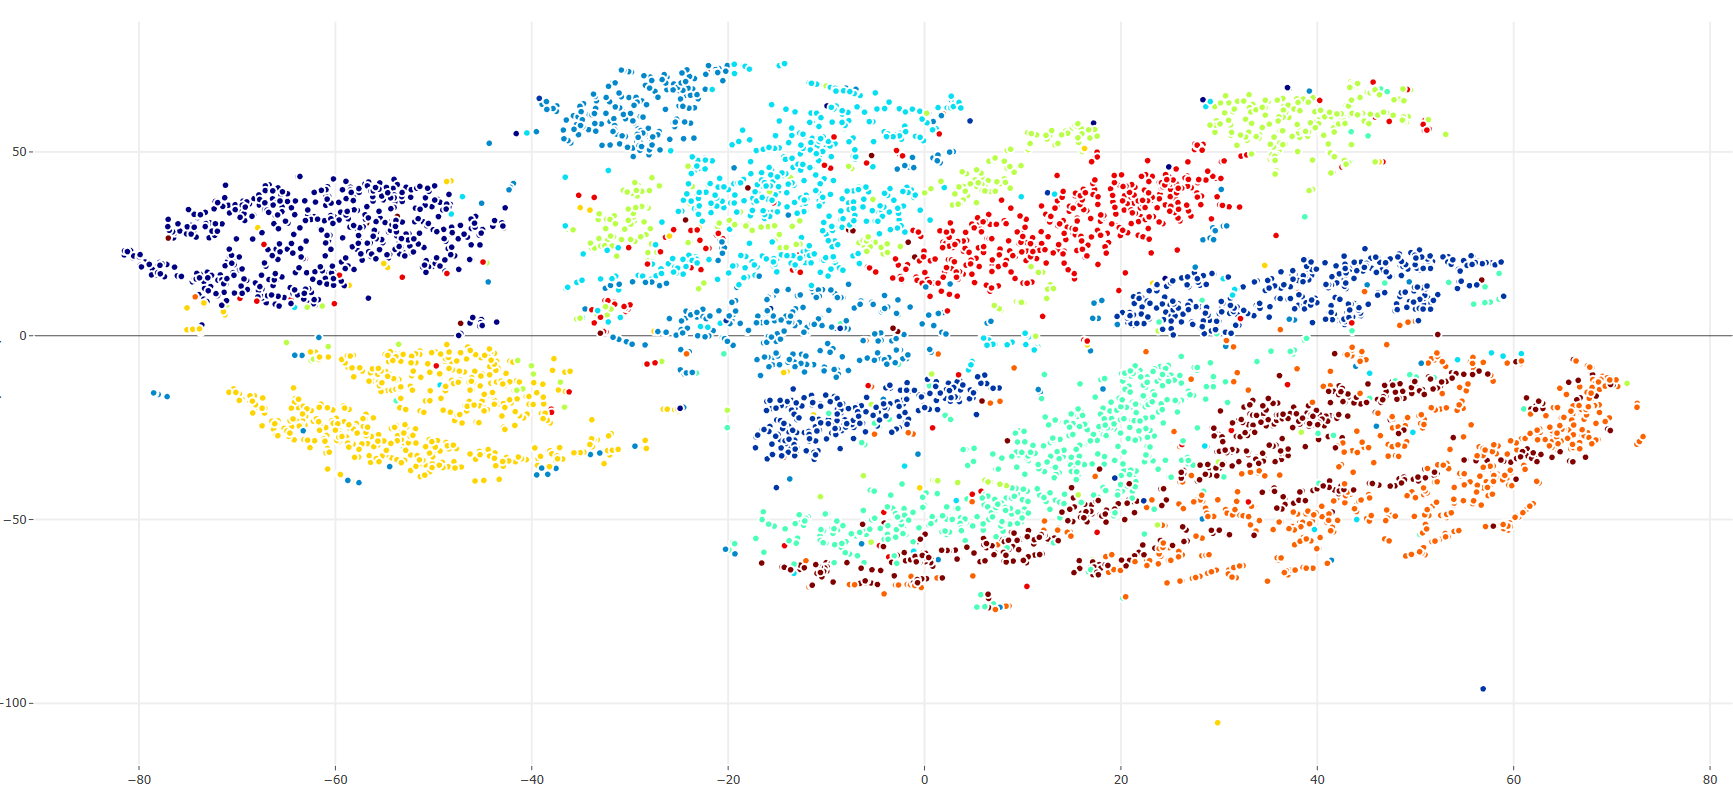

In conclusion, if i had to pick a dimensionality reduction method for the MNIST dataset, i would have to go with the TSNE method because it seperated the clusters beautifully and made it very easy to see what was what.

## Derek Byrne Indirect Activity

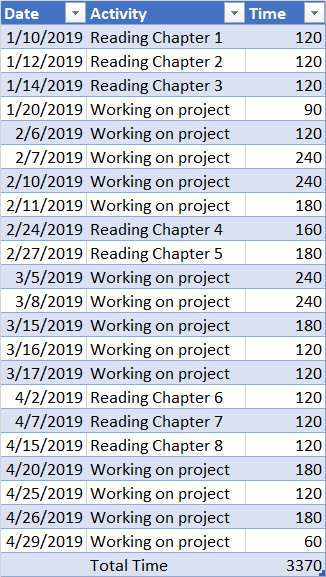